In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [65]:
df=pd.read_csv(r"c:\DATA SCIENCE\Machine_Learning\SVM\Social_Network_Ads.csv")
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [66]:
df.shape

(400, 3)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [68]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [69]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [70]:
df.duplicated().sum()

np.int64(33)

In [71]:
df.drop_duplicates(inplace=True)

In [72]:
df.duplicated().sum()

np.int64(0)

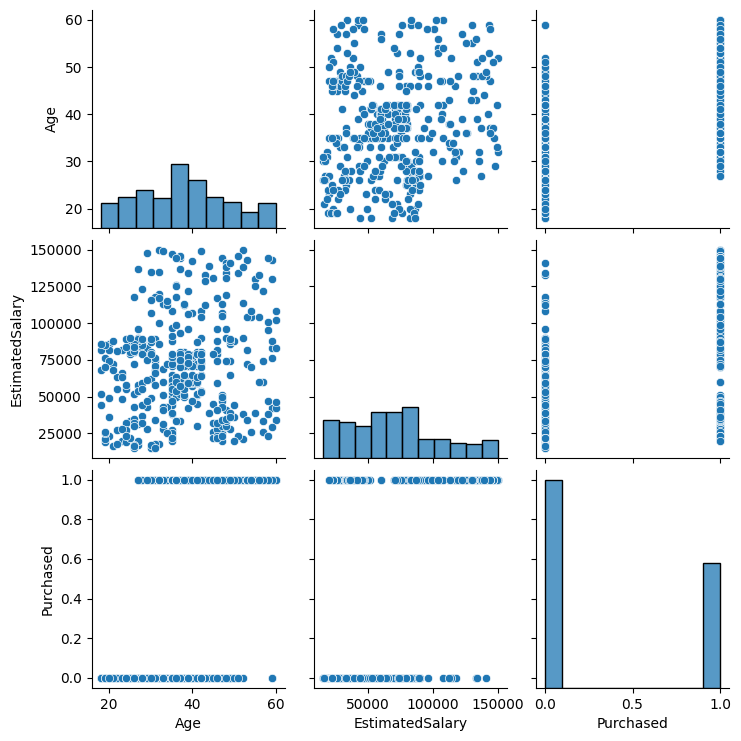

In [73]:
sns.pairplot(data=df)

<Axes: >

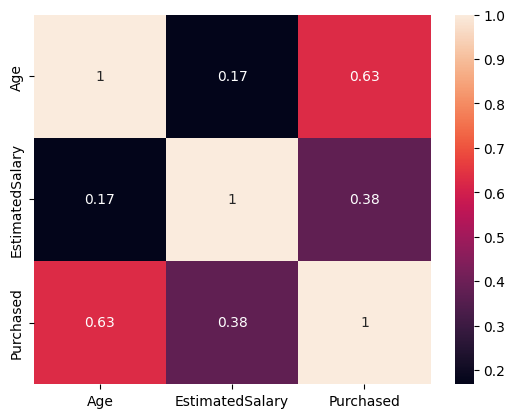

In [74]:
sns.heatmap(df.corr(),annot=True)

In [75]:
df.columns

Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [76]:
x=df[['Age', 'EstimatedSalary']]
y=df["Purchased"]


In [77]:
x


,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [79]:
from matplotlib.pylab import rand
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,train_size=0.853)
x_train.shape,x_test.shape

((313, 2), (54, 2))

linear regression

In [85]:
from sklearn.linear_model import LinearRegression
model_lin=LinearRegression()
model_lin.fit(x_train,y_train)
y_predict_lin=model_lin.predict(x_test)
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print(r2_score(y_predict_lin,y_test))
print(mean_absolute_error(y_predict_lin,y_test))
print(mean_squared_error(y_predict_lin,y_test))

-0.14247928100823715
0.31285642445691764
0.1356476885061867


lasso

In [88]:
from sklearn.linear_model import Lasso
model_lasso=Lasso()
model_lasso.fit(x_train,y_train)
y_predict_lasso=model_lasso.predict(x_test)
print(r2_score(y_predict_lasso,y_test))
print(mean_absolute_error(y_predict_lasso,y_test))
print(mean_squared_error(y_predict_lasso,y_test))

-1.1024117768385313
0.3371715717645528
0.1478332210462334


ridge

In [89]:
from sklearn.linear_model import Ridge
model_ridge=Ridge()
model_ridge.fit(x_train,y_train)
y_predict_ridge=model_ridge.predict(x_test)
print(r2_score(y_predict_ridge,y_test))
print(mean_absolute_error(y_predict_ridge,y_test))
print(mean_squared_error(y_predict_ridge,y_test))

-0.14252768239298885
0.3128567372897222
0.13564785804547197


logistic regression

In [91]:
from sklearn.linear_model import LogisticRegression
model_log=LogisticRegression()
model_log.fit(x_train,y_train)
y_predict_log=model_log.predict(x_test)
print(accuracy_score(y_predict_log,y_test))
print(confusion_matrix(y_predict_log,y_test))
print(classification_report(y_predict_log,y_test))

0.8518518518518519
[[28  5]
 [ 3 18]]
              precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.78      0.86      0.82        21

    accuracy                           0.85        54
   macro avg       0.84      0.85      0.85        54
weighted avg       0.86      0.85      0.85        54



knn

In [90]:
from sklearn.neighbors import KNeighborsClassifier
model_knn=KNeighborsClassifier()
model_knn.fit(x_train,y_train)
y_predict_knn=model_knn.predict(x_test)
print(accuracy_score(y_predict_knn,y_test))
print(confusion_matrix(y_predict_knn,y_test))
print(classification_report(y_predict_knn,y_test))

0.7592592592592593
[[26  8]
 [ 5 15]]
              precision    recall  f1-score   support

           0       0.84      0.76      0.80        34
           1       0.65      0.75      0.70        20

    accuracy                           0.76        54
   macro avg       0.75      0.76      0.75        54
weighted avg       0.77      0.76      0.76        54



support vector classification

In [83]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)
y_predict_svc=model.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_predict_svc,y_test))
print(confusion_matrix(y_predict_svc,y_test))
print(classification_report(y_predict_svc,y_test))

0.6851851851851852
[[28 14]
 [ 3  9]]
              precision    recall  f1-score   support

           0       0.90      0.67      0.77        42
           1       0.39      0.75      0.51        12

    accuracy                           0.69        54
   macro avg       0.65      0.71      0.64        54
weighted avg       0.79      0.69      0.71        54



In [93]:
from sklearn.svm import SVR
model_svr=SVR()
model_svr.fit(x_train,y_train)
y_predict_svr=model_svr.predict(x_test)
print(r2_score(y_predict_svr,y_test))
print(mean_absolute_error(y_predict_svr,y_test))
print(mean_squared_error(y_predict_svr,y_test))

-1.016884785219459
0.34234778119234927
0.25704315557788504
